Classification in GPflow
--

*Alexander G. de G. Matthews and James Hensman 2016*

This script replicates 

Hensman, Matthews, Ghahramani, AISTATS 2015, Scalable Variational Gaussian Process Classification, Figure 1 Row 1.

It serves to demonstrate sparse variational GP classification on a simple, easily visualized dataset.

In [1]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import sys
import csv
import numpy as np
import gpflow

In [2]:
Xtrain = np.loadtxt('data/banana_X_train', delimiter=',')
Ytrain = np.loadtxt('data/banana_Y_train', delimiter=',').reshape(-1,1)


In [3]:
def gridParams():
    mins = [-3.25,-2.85 ] 
    maxs = [ 3.65, 3.4 ]
    nGrid = 50
    xspaced = np.linspace( mins[0], maxs[0], nGrid )
    yspaced = np.linspace( mins[1], maxs[1], nGrid )
    xx, yy = np.meshgrid( xspaced, yspaced )
    Xplot = np.vstack((xx.flatten(),yy.flatten())).T
    return mins, maxs, xx, yy, Xplot
     
def plot(m, ax):
    col1 = '#0172B2'
    col2 = '#CC6600'
    mins, maxs, xx, yy, Xplot = gridParams()
    p = m.predict_y(Xplot)[0]
    ax.plot(Xtrain[:,0][Ytrain[:,0]==1], Xtrain[:,1][Ytrain[:,0]==1], 'o', color=col1, mew=0, alpha=0.5)
    ax.plot(Xtrain[:,0][Ytrain[:,0]==0], Xtrain[:,1][Ytrain[:,0]==0], 'o', color=col2, mew=0, alpha=0.5)
    if hasattr(m, 'Z'):
        ax.plot(m.Z.value[:,0], m.Z.value[:,1], 'ko', mew=0, ms=4)
    ax.contour(xx, yy, p.reshape(*xx.shape), [0.5], colors='k', linewidths=1.8, zorder=100)


In [6]:
# Setup the experiment and plotting.
Ms = [4, 8, 16, 32, 64]


# Run sparse classification with increasing number of inducing points
models = []
for index, num_inducing in enumerate(Ms):
    # kmeans for selecting Z
    from scipy.cluster.vq import kmeans
    Z = kmeans(Xtrain, num_inducing)[0]

    m = gpflow.svgp.SVGP(Xtrain, Ytrain,
                         kern=gpflow.kernels.RBF(2),
                         likelihood=gpflow.likelihoods.Bernoulli(), Z=Z)
    #Initially fix the hyperparameters.
    m.Z.fixed = True
    m.optimize(maxiter=20)

    #Unfix the hyperparameters.
    m.Z.fixed = False
    m.optimize(maxiter=200)
    models.append(m)




compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


In [7]:
#Run variational approximation without sparsity..
#..be aware that this is much slower.
m = gpflow.vgp.VGP(Xtrain, Ytrain,
                   kern=gpflow.kernels.RBF(2),
                   likelihood=gpflow.likelihoods.Bernoulli())
m.optimize(maxiter=2000)
models.append(m)


compiling tensorflow function...
done
optimization terminated, setting model state


[]

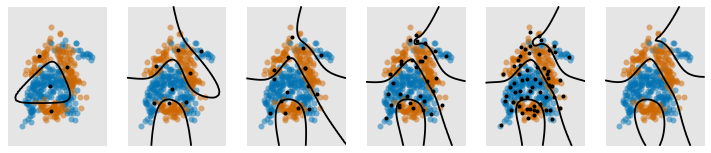

In [8]:
# make plots.
fig, axes = plt.subplots(1, len(models), figsize=(12.5, 2.5), sharex=True, sharey=True)
for i, m in enumerate(models):
    plot(m, axes[i])
axes[i].set_yticks([])
axes[i].set_xticks([])

In [9]:
models = models[:-3] + models[-1:]